# Coding test

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def print_missing_data_percentage(_dataframe):
    """
    Prints percentage of missing data in the dataframe
    """
    missing_count = _dataframe.isnull().sum() # number of missing values
    values_count = _dataframe.isnull().count() # number of values
    missing_percentage = round((missing_count/values_count)*100, 1) # percent of missing values
    print(missing_percentage)
    return

## Data Preprocessing

Note: Data has some QAQC issues including missing data and unsuitable detection limits (-999, characters).

In [3]:
# Loading the dataset
geochemical_assays = pd.read_csv('./data/data_for_distribution.csv')
geochemical_assays_orig = pd.read_csv('./data/data_for_distribution.csv')
geochemical_assays.head()

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,A04812,SOLVE003,561,571.0,NaN,0.066,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,A
1,A03356,SOLVE003,571,581.0,NaN,0.152,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,A
2,A04764,SOLVE003,581,591.0,NaN,0.068,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,A
3,A04626,SOLVE003,591,601.0,NaN,0.074,891.60,48620.0,63.0000,4.200,820.8000,39.6000,A
4,A05579,SOLVE003,601,611.0,NaN,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,A


In [4]:
# printing dataset size
geochemical_assays.shape[0]

4771

In [5]:
# checking different types of data in dataset
geochemical_assays.dtypes

Unique_ID     object
holeid        object
from           int64
to           float64
As           float64
Au            object
Pb           float64
Fe           float64
Mo           float64
Cu           float64
S            float64
Zn           float64
Class         object
dtype: object

In [6]:
# chemical components in the data
chem_elem_list = ['As', 'Au', 'Pb', 'Fe', 'Mo', 'Cu', 'S', 'Zn']

In [7]:
# printing stats on dataset
geochemical_assays[chem_elem_list].describe()

,As,Pb,Fe,Mo,Cu,S,Zn
count,3268.000000,4756.000000,4709.000000,4741.000000,4746.000000,4761.000000,4762.000000
mean,19.730855,689.831232,49952.514598,9.991452,12.450601,9750.033213,59.389636
std,37.181529,1047.642566,21490.606419,87.098943,107.438873,15557.657335,120.489477
min,1.000000,1.600000,2080.000000,-999.000000,1.000000,26.000000,5.600000
25%,5.400000,132.200000,39260.000000,1.400000,3.000000,1338.000000,29.800000
50%,9.200000,396.700000,49020.000000,4.400000,4.600000,3636.000000,38.200000
75%,20.000000,940.200000,58420.000000,17.400000,8.000000,10988.000000,52.600000
max,827.800000,29793.800000,397000.000000,1939.400000,6767.000000,217600.000000,3455.000000


In [8]:
# dropping rows with entire nan values
idx = geochemical_assays[chem_elem_list].index[geochemical_assays[chem_elem_list].isnull().all(1)]
geochemical_assays = geochemical_assays.drop(geochemical_assays.index[idx])
geochemical_assays.shape

(4768, 13)

In [9]:
# replacing '<0.005' with 0.00005 and converting string column to numeric
geochemical_assays.replace(to_replace={'Au':'<0.005'}, value='0.00005', inplace=True)
geochemical_assays[["Au"]] = geochemical_assays[["Au"]].apply(pd.to_numeric)
geochemical_assays.loc[80:84]

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
80,A07445,SOLVE008,531,541.0,NaN,0.01200,19.2,46380.0,1.4,9.6,33920.0,55.0,A
81,A08494,SOLVE008,541,551.0,NaN,0.00005,108.6,55720.0,2.0,7.2,37760.0,54.8,A
82,A07867,SOLVE008,551,561.0,NaN,0.00800,96.0,59020.0,1.4,7.6,14760.0,65.2,A
83,A07184,SOLVE008,561,571.0,NaN,0.01500,201.4,59100.0,2.2,6.6,27000.0,45.8,A
84,A07438,SOLVE008,571,581.0,NaN,0.01200,173.8,57680.0,3.4,27.6,10890.0,32.8,A


In [10]:
# checking different types of data in dataset
geochemical_assays.dtypes

Unique_ID     object
holeid        object
from           int64
to           float64
As           float64
Au           float64
Pb           float64
Fe           float64
Mo           float64
Cu           float64
S            float64
Zn           float64
Class         object
dtype: object

In [11]:
# printing percentage of missing data
print_missing_data_percentage(geochemical_assays[chem_elem_list])

As    31.5
Au     0.1
Pb     0.3
Fe     1.2
Mo     0.6
Cu     0.5
S      0.1
Zn     0.1
dtype: float64


In [12]:
# replacing '-999' with 0.01
geochemical_assays.replace(to_replace={'Mo':-999}, value=0.1, inplace=True)
geochemical_assays.loc[geochemical_assays.shape[0]-70:geochemical_assays.shape[0]-60]

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
4698,A05748,SOLVE291,601,611.0,NaN,0.040,11.7,61440.0,0.1,5.0,52260.0,97.2,?
4699,A07780,SOLVE291,611,621.0,NaN,0.009,5.1,71200.0,0.1,3.4,58960.0,100.4,?
4700,A07655,SOLVE291,621,631.0,NaN,0.010,13.4,72860.0,0.1,3.4,54980.0,76.4,?
4701,A07907,SOLVE291,631,641.0,NaN,0.008,14.8,68620.0,1.2,3.0,48100.0,67.6,?
4702,A08046,SOLVE291,641,651.0,NaN,0.007,9.2,66820.0,0.1,10.8,42740.0,59.8,?
4703,A08255,SOLVE291,651,661.0,NaN,0.006,10.0,64900.0,0.1,15.4,36560.0,69.2,?
4704,A07203,SOLVE291,661,671.0,NaN,0.015,11.6,74940.0,0.1,3.0,43140.0,84.2,?
4705,A07041,SOLVE291,671,681.0,NaN,0.017,6.7,76320.0,0.1,3.0,39220.0,78.4,?
4706,A06154,SOLVE291,681,691.0,NaN,0.032,368.0,70520.0,0.1,3.0,36320.0,66.6,?
4707,A05501,SOLVE291,691,701.0,NaN,0.046,37.8,63900.0,1.2,13.0,30260.0,60.0,?


In [13]:
# replacing 'NaN' with 0 in 'As' column
geochemical_assays.replace(to_replace={'As':np.nan}, value=0, inplace=True)
geochemical_assays.loc[0:10]

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
0,A04812,SOLVE003,561,571.0,0.0,0.066000,1031.00,61380.0,138.2000,3.600,3586.0000,43.6000,A
1,A03356,SOLVE003,571,581.0,0.0,0.152000,1982.00,50860.0,75.4000,4.800,1822.0000,36.4000,A
2,A04764,SOLVE003,581,591.0,0.0,0.068000,1064.80,57940.0,29.2000,3.000,740.4000,36.6000,A
3,A04626,SOLVE003,591,601.0,0.0,0.074000,891.60,48620.0,63.0000,4.200,820.8000,39.6000,A
4,A05579,SOLVE003,601,611.0,0.0,0.043125,801.25,51025.0,56.0625,4.875,745.6875,32.3125,A
5,A04316,SOLVE004,541,551.0,0.0,0.088000,2213.60,55400.0,131.2000,3.000,1963.8000,25.4000,A
6,A04127,SOLVE004,551,561.0,0.0,0.098000,2679.00,59280.0,93.0000,3.000,2085.6000,23.4000,A
7,A05248,SOLVE004,561,571.0,0.0,0.052000,1373.60,44060.0,43.0000,3.000,1661.6000,24.0000,A
8,A04438,SOLVE004,571,581.0,0.0,0.082000,1398.00,33940.0,45.0000,3.000,1676.8000,31.4000,A
9,A04198,SOLVE004,581,591.0,0.0,0.094000,1500.00,48100.0,119.8000,3.000,1263.2000,27.2000,A


In [14]:
# printing the nan value before interpolation
geochemical_assays[geochemical_assays['holeid']=='SOLVE004'].iloc[16:19]

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
21,A05079,SOLVE004,701,711.0,0.0,0.058,1205.4,55960.0,17.2,3.0,4864.0,27.4,A
22,A02308,SOLVE004,711,721.0,0.0,0.274,1967.4,66040.0,NaN,4.6,2151.0,26.6,A
23,A03979,SOLVE004,721,731.0,0.0,0.106,715.0,59500.0,20.2,150.4,2628.8,416.6,A


In [15]:
# doing linear interpolation for nan values except for 'As' column
for hole_id in geochemical_assays['holeid'].unique():
    indx = geochemical_assays['holeid']==hole_id
    geochemical_assays[indx] = geochemical_assays[indx].interpolate(method='linear', limit_direction='both')

In [16]:
# printing the nan value after interpolation
geochemical_assays[geochemical_assays['holeid']=='SOLVE004'].iloc[16:19]

,Unique_ID,holeid,from,to,As,Au,Pb,Fe,Mo,Cu,S,Zn,Class
21,A05079,SOLVE004,701,711.0,0.0,0.058,1205.4,55960.0,17.2,3.0,4864.0,27.4,A
22,A02308,SOLVE004,711,721.0,0.0,0.274,1967.4,66040.0,18.7,4.6,2151.0,26.6,A
23,A03979,SOLVE004,721,731.0,0.0,0.106,715.0,59500.0,20.2,150.4,2628.8,416.6,A


In [17]:
# printing stats on dataset
geochemical_assays[chem_elem_list].describe()

,As,Au,Pb,Fe,Mo,Cu,S,Zn
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,13.523581,0.051789,691.089920,49968.106385,15.890892,12.429356,9746.622274,59.354624
std,32.115680,0.090016,1047.585464,21451.917452,39.152049,107.191737,15549.390346,120.418069
min,0.000000,0.000050,1.600000,2080.000000,0.100000,1.000000,26.000000,5.600000
25%,0.000000,0.010000,132.500000,39345.000000,1.400000,3.000000,1338.000000,29.800000
50%,5.600000,0.027000,399.000000,49030.000000,4.400000,4.600000,3640.000000,38.200000
75%,13.400000,0.062000,942.400000,58420.000000,17.400000,8.000000,10982.000000,52.600000
max,827.800000,1.878000,29793.800000,397000.000000,1939.400000,6767.000000,217600.000000,3455.000000


In [18]:
# train and test dataset options
remove_As = False # remove 'As' column
use_quantile = False # check for right or left skewedness in the data

In [19]:
# divide the data into train and test sets
geoche_assays_train = geochemical_assays[geochemical_assays['Class']!='?']
geoche_assays_test = geochemical_assays[geochemical_assays['Class']=='?']

# testing quantile condition
if use_quantile:
    df = geoche_assays_train[chem_elem_list]
    q_val = 0.98
    
    cond1 = df['As']<df['As'].quantile(q_val)
    cond2 = df['Au']<df['Au'].quantile(q_val)
    cond3 = df['Pb']<df['Pb'].quantile(q_val)
    cond4 = df['Fe']<df['Fe'].quantile(q_val)
    cond5 = df['Mo']<df['Mo'].quantile(q_val)
    cond6 = df['Cu']<df['Cu'].quantile(q_val)
    cond7 = df['S']<df['S'].quantile(q_val)
    cond8 = df['Zn']<df['Zn'].quantile(q_val)
    cond = cond1&cond2&cond3&cond4&cond5&cond6&cond7&cond8

    geoche_assays_train = geoche_assays_train[cond]

if remove_As:
    columns_to_drop = ['Unique_ID', 'holeid', 'from', 'to', 'As', 'Class']
else:
    columns_to_drop = ['Unique_ID', 'holeid', 'from', 'to', 'Class']

train_data, train_target = geoche_assays_train.drop(columns=columns_to_drop), geoche_assays_train["Class"]
test_data = geoche_assays_test.drop(columns=columns_to_drop)

In [20]:
# printing stats about training data
train_data.describe()

,As,Au,Pb,Fe,Mo,Cu,S,Zn
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,11.577881,0.051690,714.844029,48942.326262,17.200825,13.627188,9703.859955,59.546911
std,27.539312,0.085024,939.057799,18464.948603,41.720510,116.783924,14939.645395,126.642272
min,0.000000,0.000050,1.700000,2080.000000,1.000000,1.000000,26.000000,5.600000
25%,0.000000,0.011000,151.400000,38440.000000,2.000000,3.000000,1280.000000,29.600000
50%,4.800000,0.028000,464.000000,48780.000000,5.600000,5.000000,3740.000000,37.600000
75%,11.600000,0.062000,1000.200000,58560.000000,19.600000,8.600000,11740.000000,51.800000
max,827.800000,1.878000,29793.800000,331400.000000,1939.400000,6767.000000,217600.000000,3455.000000


In [21]:
# printing stats about test data
test_data.describe()

,As,Au,Pb,Fe,Mo,Cu,S,Zn
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,23.673182,0.052307,567.178329,55319.014169,9.057721,6.180954,9969.688815,58.351570
std,48.326442,0.112587,1485.404060,32391.868615,19.861493,15.478910,18415.165608,80.549329
min,0.000000,0.000050,1.600000,18510.000000,0.100000,1.000000,50.000000,12.800000
25%,5.000000,0.008000,82.800000,43620.000000,1.000000,2.200000,1510.000000,31.000000
50%,10.400000,0.020000,177.000000,50080.000000,1.400000,3.200000,3280.000000,41.000000
75%,24.000000,0.058000,546.700000,57700.000000,6.800000,5.000000,7880.000000,57.500000
max,667.600000,1.618000,19000.000000,397000.000000,222.600000,209.800000,166040.000000,1237.600000


## Visual inspection of the data

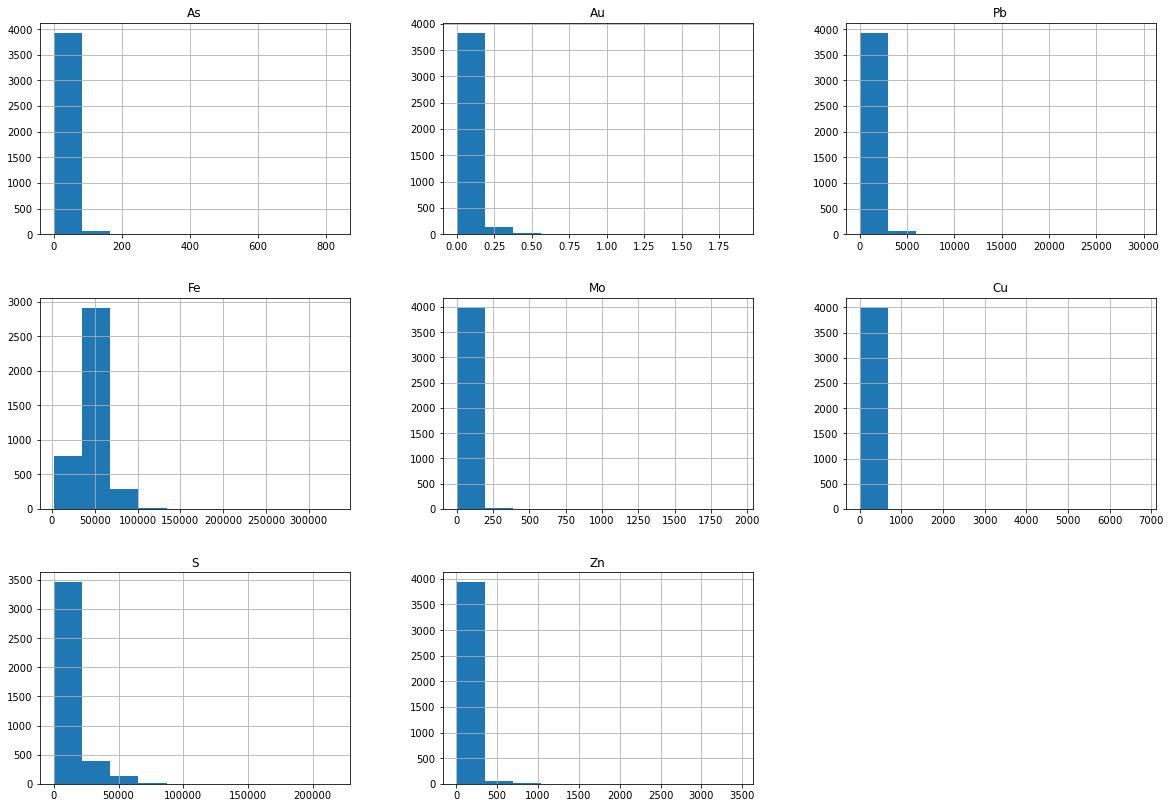

In [22]:
_ = train_data.hist(figsize=(20, 14))

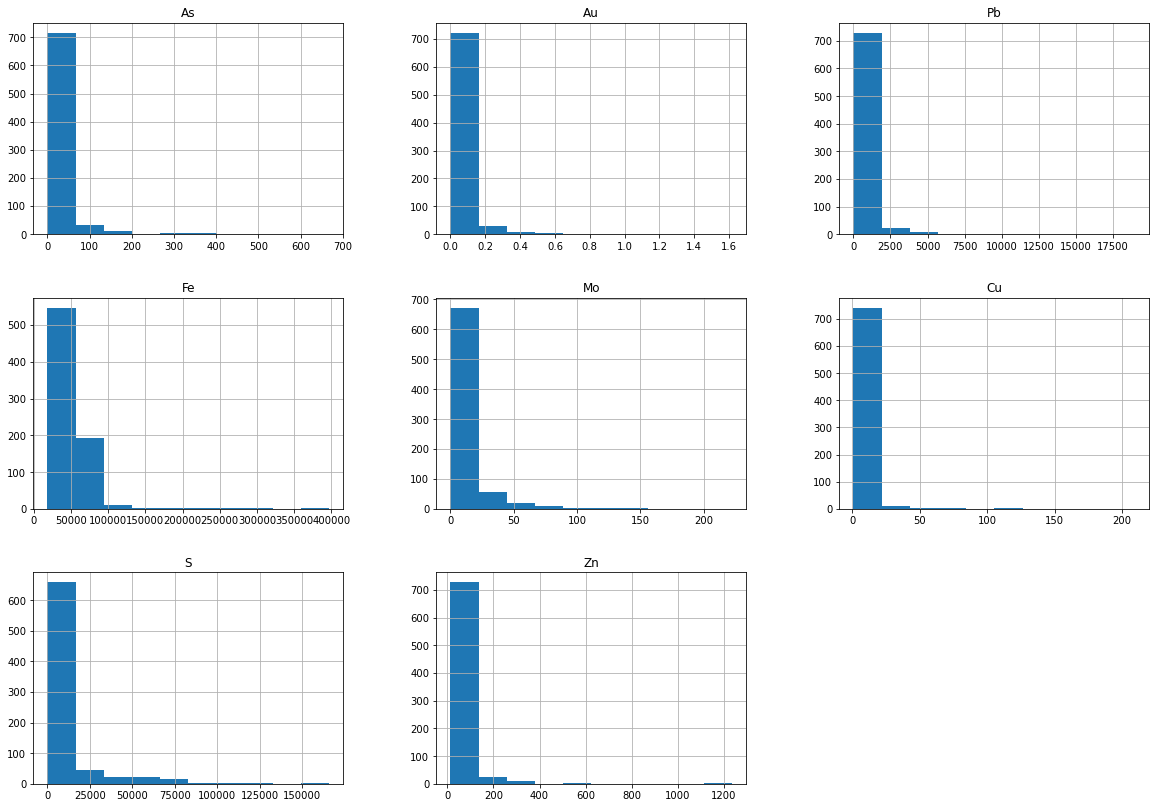

In [23]:
_ = test_data.hist(figsize=(20, 14))

## Creating train and test dataset using Scikit

In [24]:
split_train_data = False # using train data to create train and test datasets

In [25]:
if split_train_data:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.19, random_state=52)
    X_train, y_train = train_data, train_target
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
else:
    X_train, X_test, y_train = train_data, test_data, train_target
    print(X_train.shape, X_test.shape, y_train.shape)

(4001, 8) (767, 8) (4001,)


## Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# printing predicted values
if not split_train_data:
#     print(y_pred)
    geoche_assays_test = geochemical_assays_orig[geochemical_assays_orig['Class']=='?']
    geoche_assays_test = geoche_assays_test.drop(['Class'], axis=1)
    geoche_assays_test['Class'] = y_pred
    
    import os
    if os.path.isfile('./coding_test_results.csv'):
        os.remove('./coding_test_results.csv')
    geoche_assays_test.to_csv('./coding_test_results.csv', sep=',', index=False)

In [28]:
# computing accuracy
if split_train_data:
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))